# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import joblib

# Load Dataset

In [2]:
data = pd.read_csv('../Datasets/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

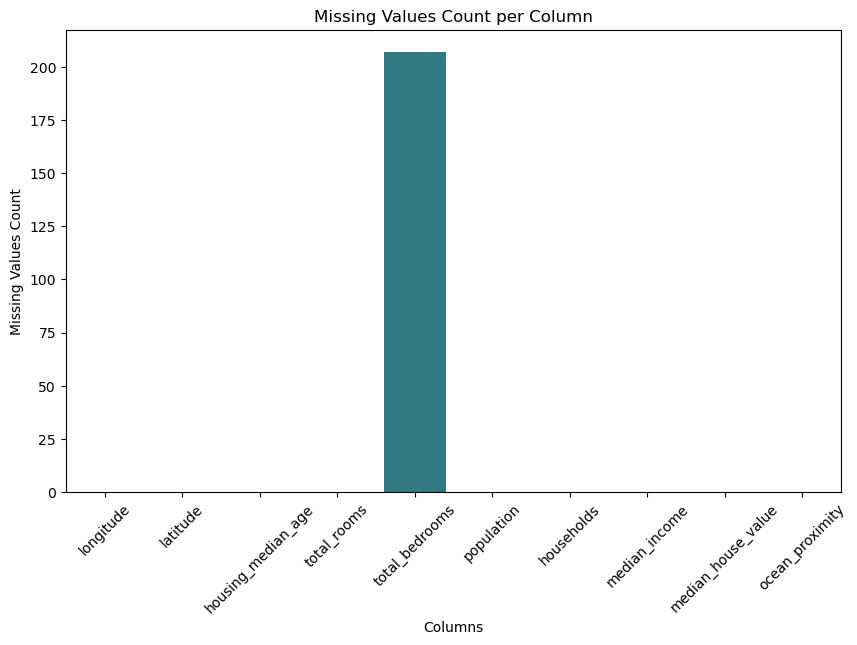

In [8]:
# Compute missing values count for each column
missing_values_count = data.isnull().sum()

# Plot missing values count
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette='viridis')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
data['ocean_proximity'].unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

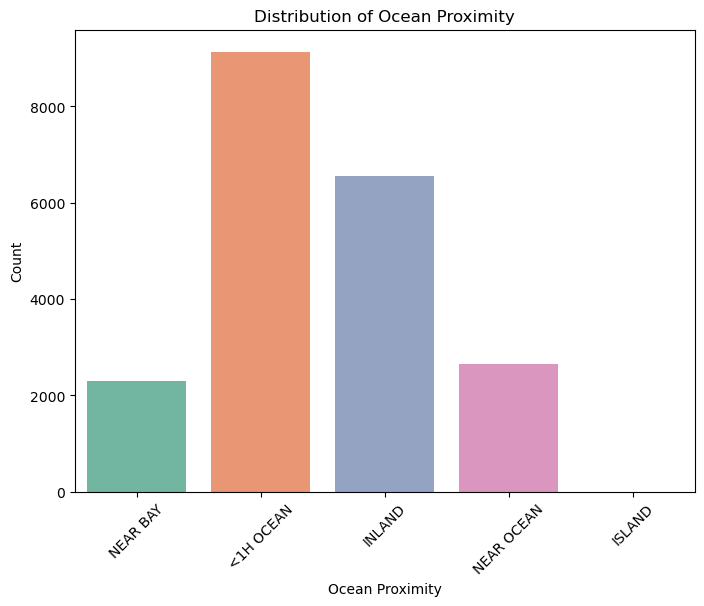

In [10]:
# Plot the distribution of the categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ocean_proximity', palette='Set2')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


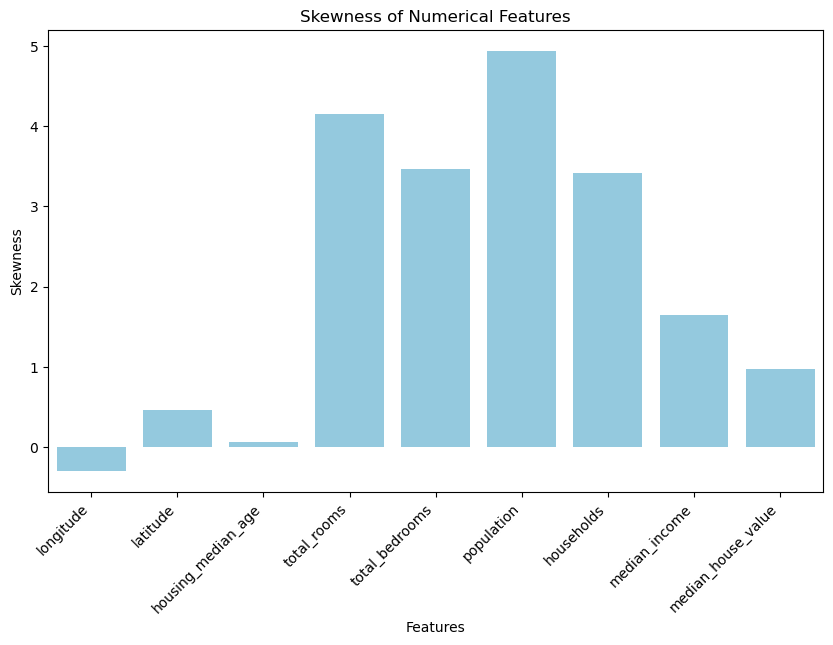

In [11]:
# Calculate skewness for each numerical column
skewness = data.select_dtypes(include=['float64']).skew()

# Plot skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='skyblue')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.show()

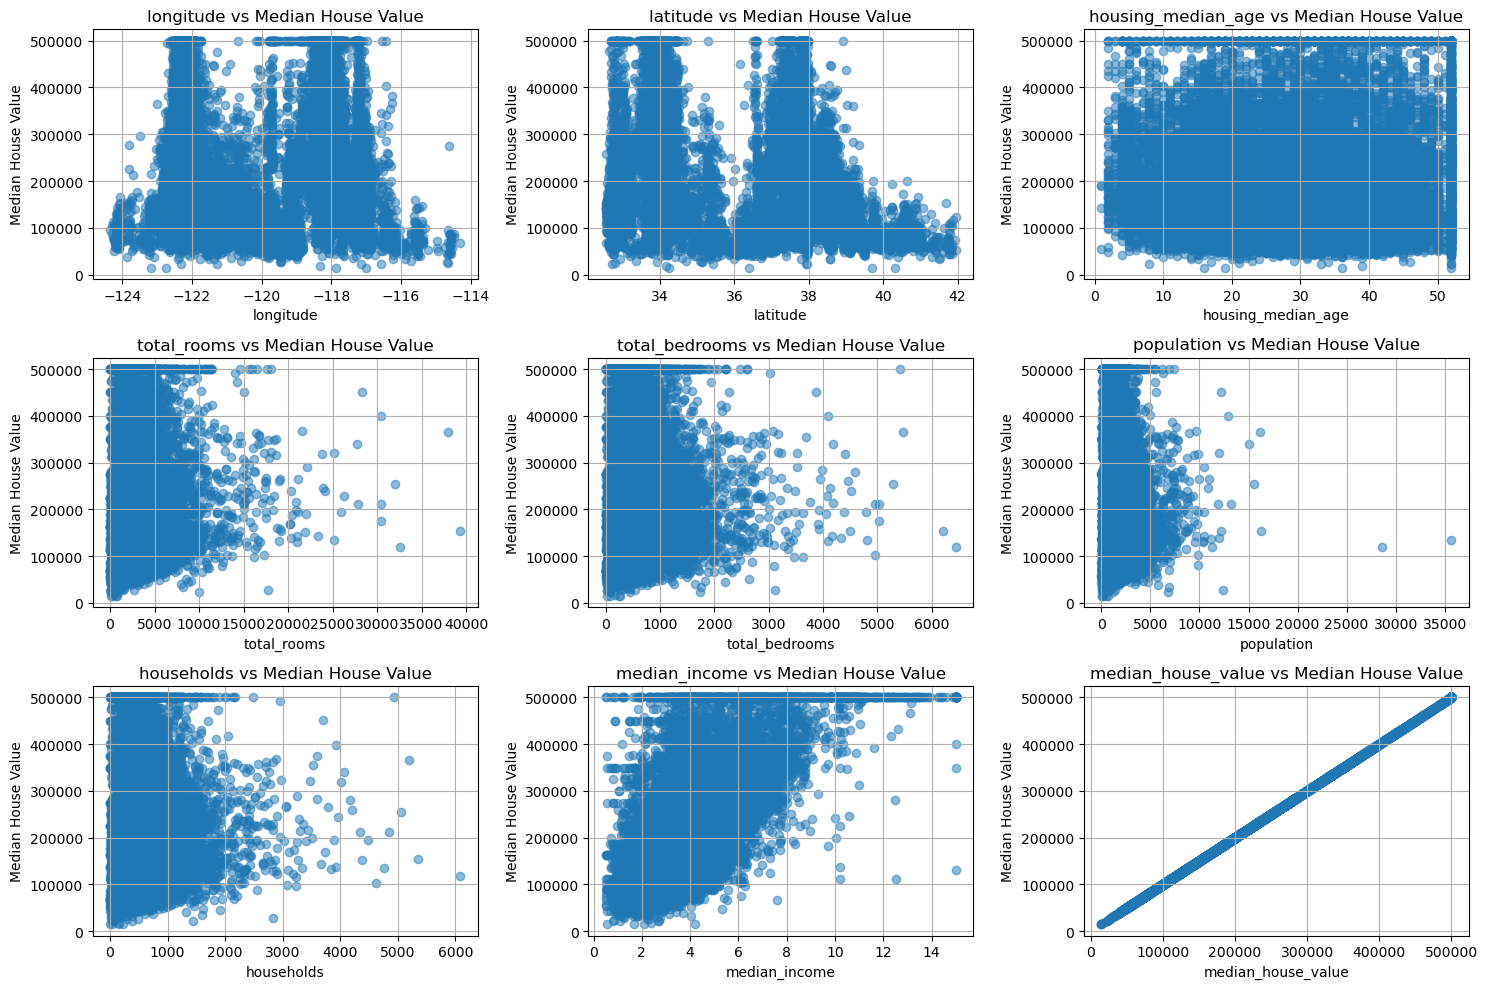

In [12]:
def plot_scatter_numerical(data):
    numerical_cols = data.select_dtypes(include=['float64']).columns

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 3, i)
        plt.scatter(data[col], data['median_house_value'], alpha=0.5)
        plt.title(f'{col} vs Median House Value')
        plt.xlabel(col)
        plt.ylabel('Median House Value')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_scatter_numerical(data)

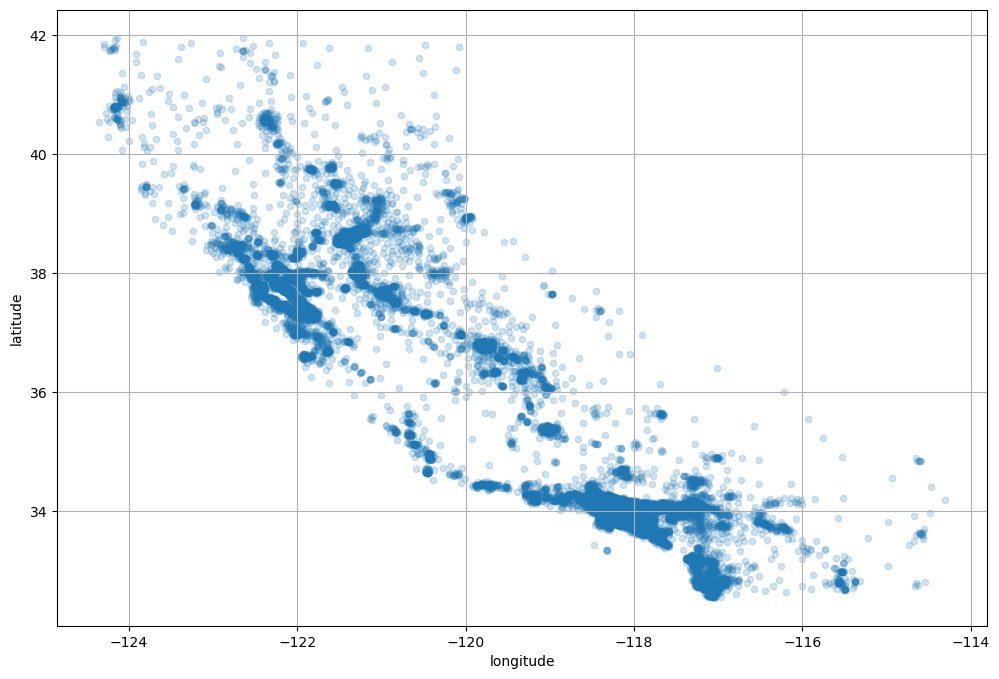

In [13]:
# Visualize the latitude and longitude using scatter plot
data.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2,figsize=(12,8))
# aplha is use in this case to make dense scatter plot appear darker
plt.show()

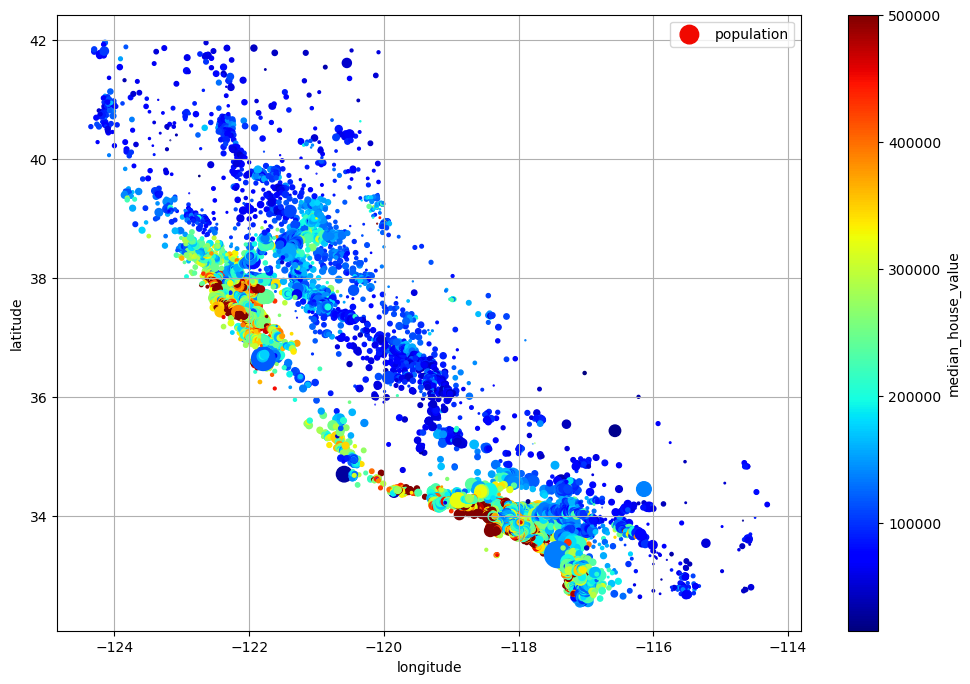

In [14]:
data.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             # Radius of the circle with respect to the population/100 [Marker size]
            s=data["population"] / 100, label="population",
            # Differentiate colors of the plot using median_house_value [Marker Color]
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(12, 8))
plt.show()

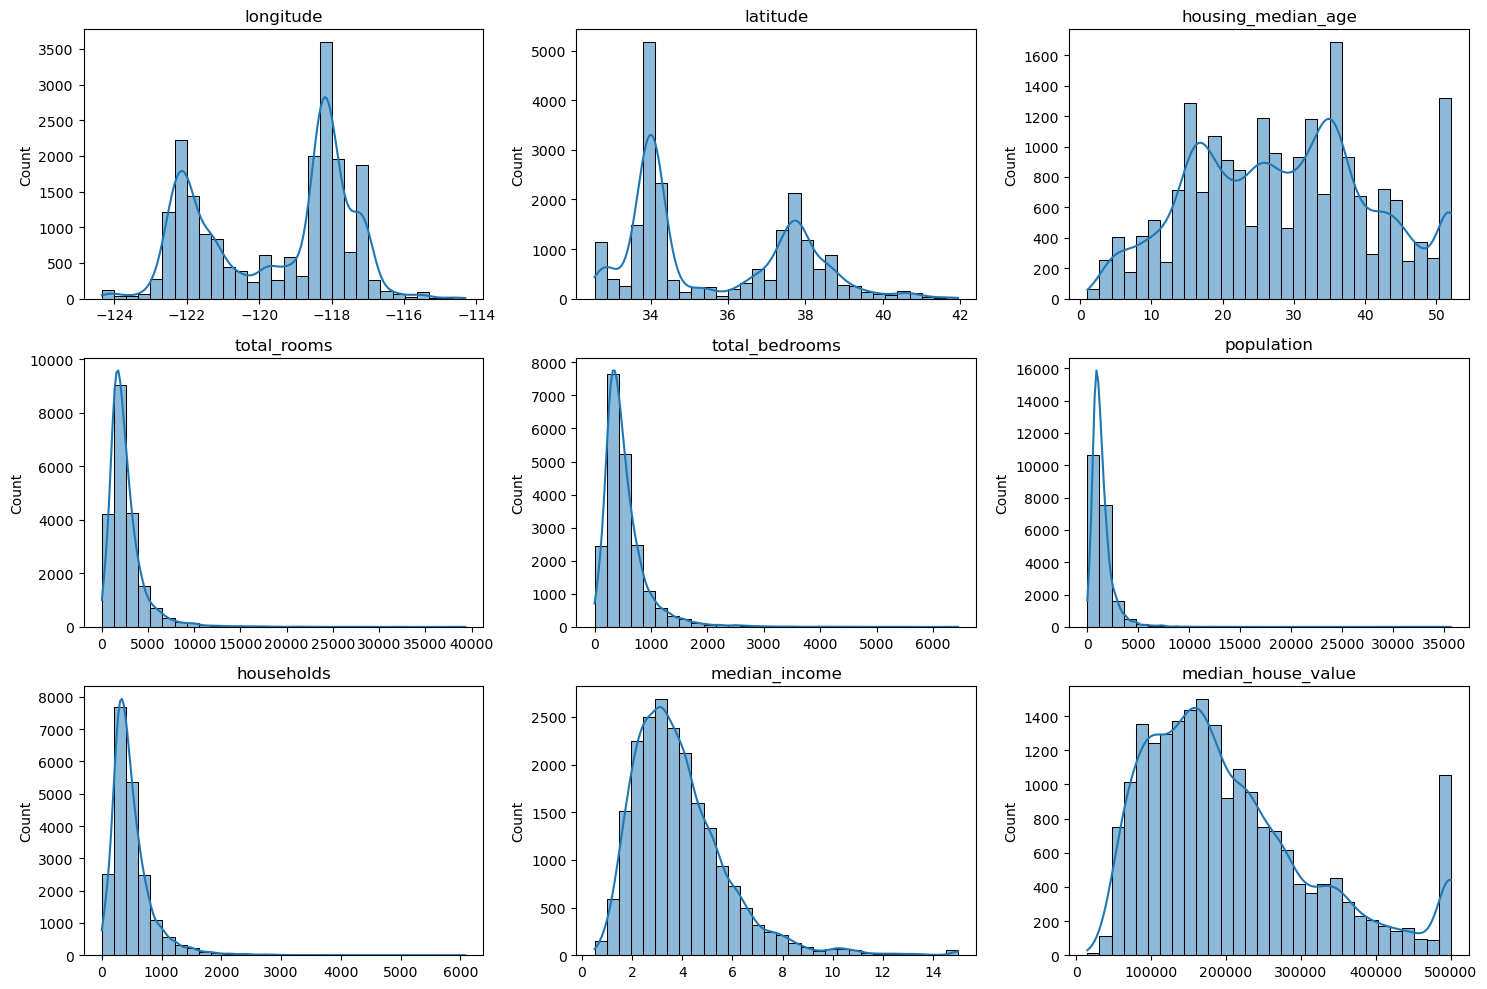

In [15]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64']).columns

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

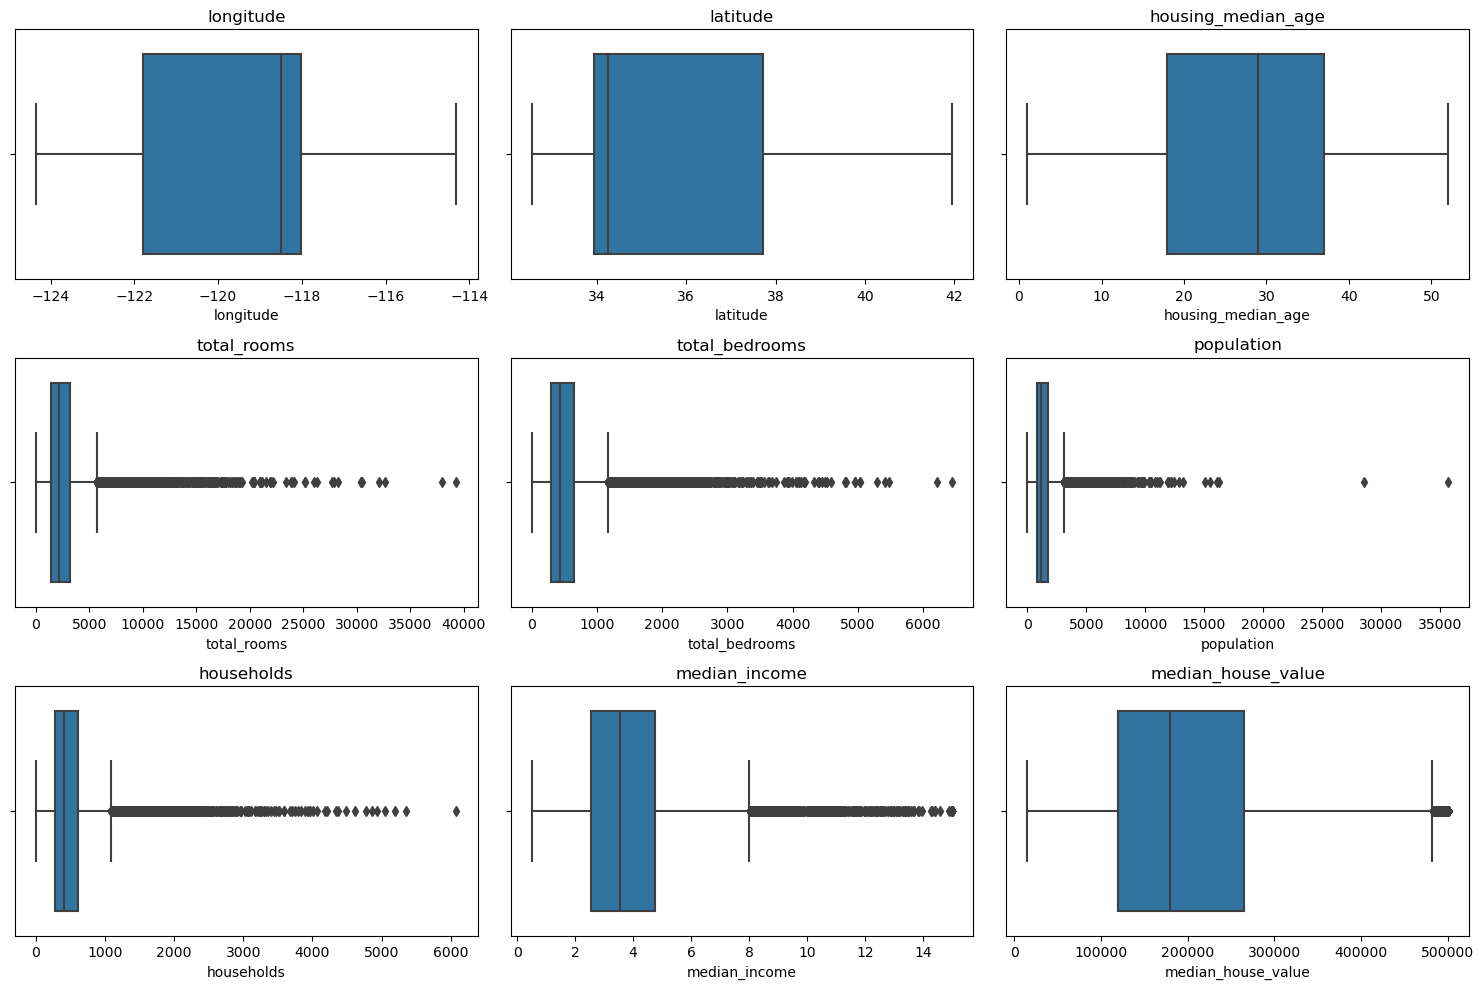

In [16]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

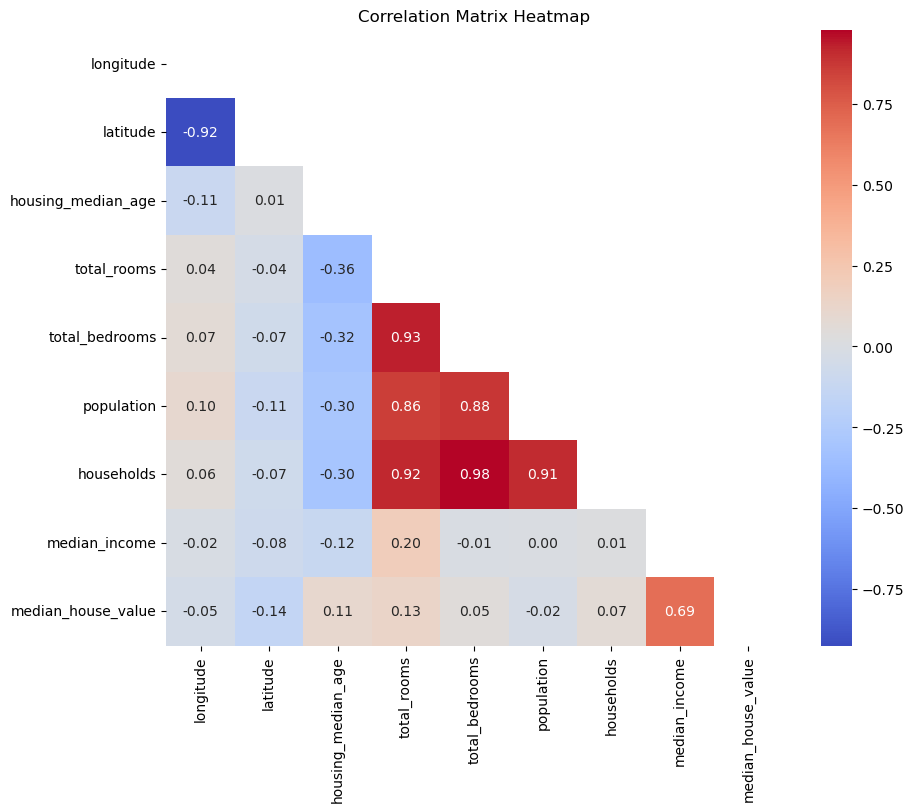

In [17]:
# Select numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Data Preprocessing

## Data Cleansing
- For cleansing, it seems that we only need to handle outliers and missing values by performing imputation, replacing them with the median value.

In [18]:
# Define a function to detect outlier using IQR method
def detect_outliers(data_series):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]

    return outliers

- total_rooms

In [19]:
# Detect outlier 
outliers_total_rooms = detect_outliers(data['total_rooms'])
# Get the min value of outlier
min_total_rooms_outlier = outliers_total_rooms.min()
min_total_rooms_outlier

5699.0

In [20]:
# Check outlier data
data[data['total_rooms'] >= min_total_rooms_outlier]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


In [21]:
# Check column description
data[['total_rooms']].describe()

,total_rooms
count,20640.000000
mean,2635.763081
std,2181.615252
min,2.000000
25%,1447.750000
50%,2127.000000
75%,3148.000000
max,39320.000000


In [22]:
# Imputation by mean value
# data.loc[data['total_rooms'] >= min_total_rooms_outlier, 'total_rooms'] = 2635
data.loc[data['total_rooms'] >= min_total_rooms_outlier, 'total_rooms'] = data['total_rooms'].median()

- total_bedrooms

In [23]:
# Check column description
data[['total_bedrooms']].describe()

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


In [24]:
# Imputation by mean value
data.loc[data['total_bedrooms'].isnull(), 'total_bedrooms'] = 537

In [25]:
# Detect outlier 
outliers_total_bedrooms = detect_outliers(data['total_bedrooms'])
# Get the min value of outlier
min_total_bedrooms_outlier = outliers_total_bedrooms.min()
min_total_bedrooms_outlier

1163.0

In [26]:
# Check outlier data
data[data['total_bedrooms'] >= min_total_bedrooms_outlier]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
101,-122.25,37.81,28.0,2127.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,2127.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND
20543,-121.74,38.55,33.0,2127.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,2127.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,2127.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [27]:
# Imputation by mean value
# data.loc[data['total_bedrooms'] >= min_total_bedrooms_outlier, 'total_bedrooms'] = 537
data.loc[data['total_bedrooms'] >= min_total_bedrooms_outlier, 'total_bedrooms'] = data['total_bedrooms'].median()

- population

In [28]:
# Detect outlier 
outliers_population = detect_outliers(data['population'])
# Get the min value of outlier
min_population_outlier = outliers_population.min()
min_population_outlier

3134.0

In [29]:
# Check outlier data
data[data['population'] >= min_population_outlier]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,438.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
185,-122.23,37.79,43.0,2127.0,438.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,2127.0,438.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
460,-122.26,37.87,52.0,1087.0,371.0,3337.0,350.0,1.4012,175000.0,NEAR BAY
485,-122.26,37.86,35.0,5161.0,438.0,3276.0,1742.0,1.6307,253600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,2127.0,438.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,2127.0,438.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,2127.0,438.0,6837.0,2358.0,3.1250,132500.0,INLAND
20604,-121.54,39.12,17.0,4251.0,899.0,3265.0,934.0,2.3496,65000.0,INLAND


In [30]:
# Check column description
data[['population']].describe()

,population
count,20640.000000
mean,1425.476744
std,1132.462122
min,3.000000
25%,787.000000
50%,1166.000000
75%,1725.000000
max,35682.000000


In [31]:
# Imputation by mean value
# data.loc[data['population'] >= min_population_outlier, 'population'] = 1425
data.loc[data['population'] >= min_population_outlier, 'population'] = data['population'].median()

- households

In [32]:
# Detect outlier 
outliers_households = detect_outliers(data['households'])
# Get the min value of outlier
min_households_outlier = outliers_households.min()
min_households_outlier

1093.0

In [33]:
# Check outlier data
data[data['households'] >= min_households_outlier]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,2127.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,438.0,1166.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,438.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,438.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,438.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20541,-121.70,38.54,13.0,2127.0,1158.0,2828.0,1115.0,4.6225,226500.0,INLAND
20543,-121.74,38.55,33.0,2127.0,438.0,1166.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,2127.0,438.0,1166.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,2127.0,438.0,1166.0,2358.0,3.1250,132500.0,INLAND


In [34]:
# Check column description
data[['households']].describe()

,households
count,20640.000000
mean,499.539680
std,382.329753
min,1.000000
25%,280.000000
50%,409.000000
75%,605.000000
max,6082.000000


In [35]:
# Imputation by mean value
# data.loc[data['households'] >= min_households_outlier, 'households'] = 500
data.loc[data['households'] >= min_households_outlier, 'households'] = data['households'].median()

- median_income

In [36]:
# Detect outlier 
outliers_median_income = detect_outliers(data['median_income'])
# Get the min value of outlier
min_median_income_outlier = outliers_median_income.min()
min_median_income_outlier

8.0137

In [37]:
# Check outlier data
data[data['median_income'] >= min_median_income_outlier]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2127.0,1106.0,2401.0,409.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,2127.0,438.0,1166.0,409.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,2127.0,1114.0,1166.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [38]:
# Check column description
data[['median_income']].describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [39]:
# Imputation by mean value
# data.loc[data['median_income'] >= min_median_income_outlier, 'median_income'] = 3.870671
data.loc[data['median_income'] >= min_median_income_outlier, 'median_income'] = data['median_income'].median()

#### Let's explore the data again after cleansing.

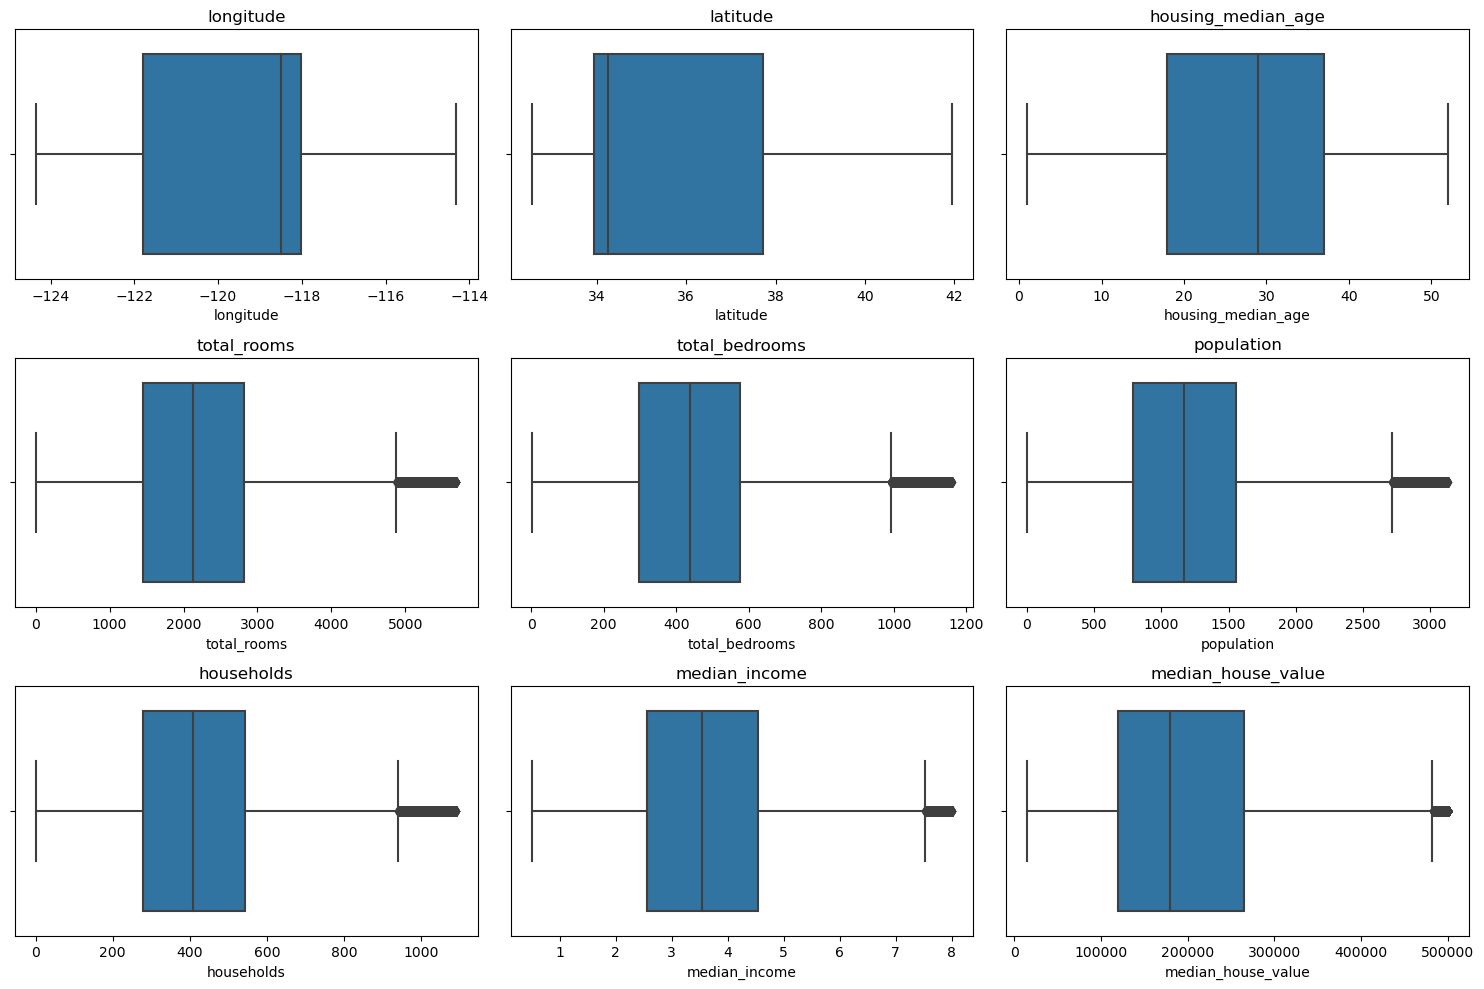

In [40]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

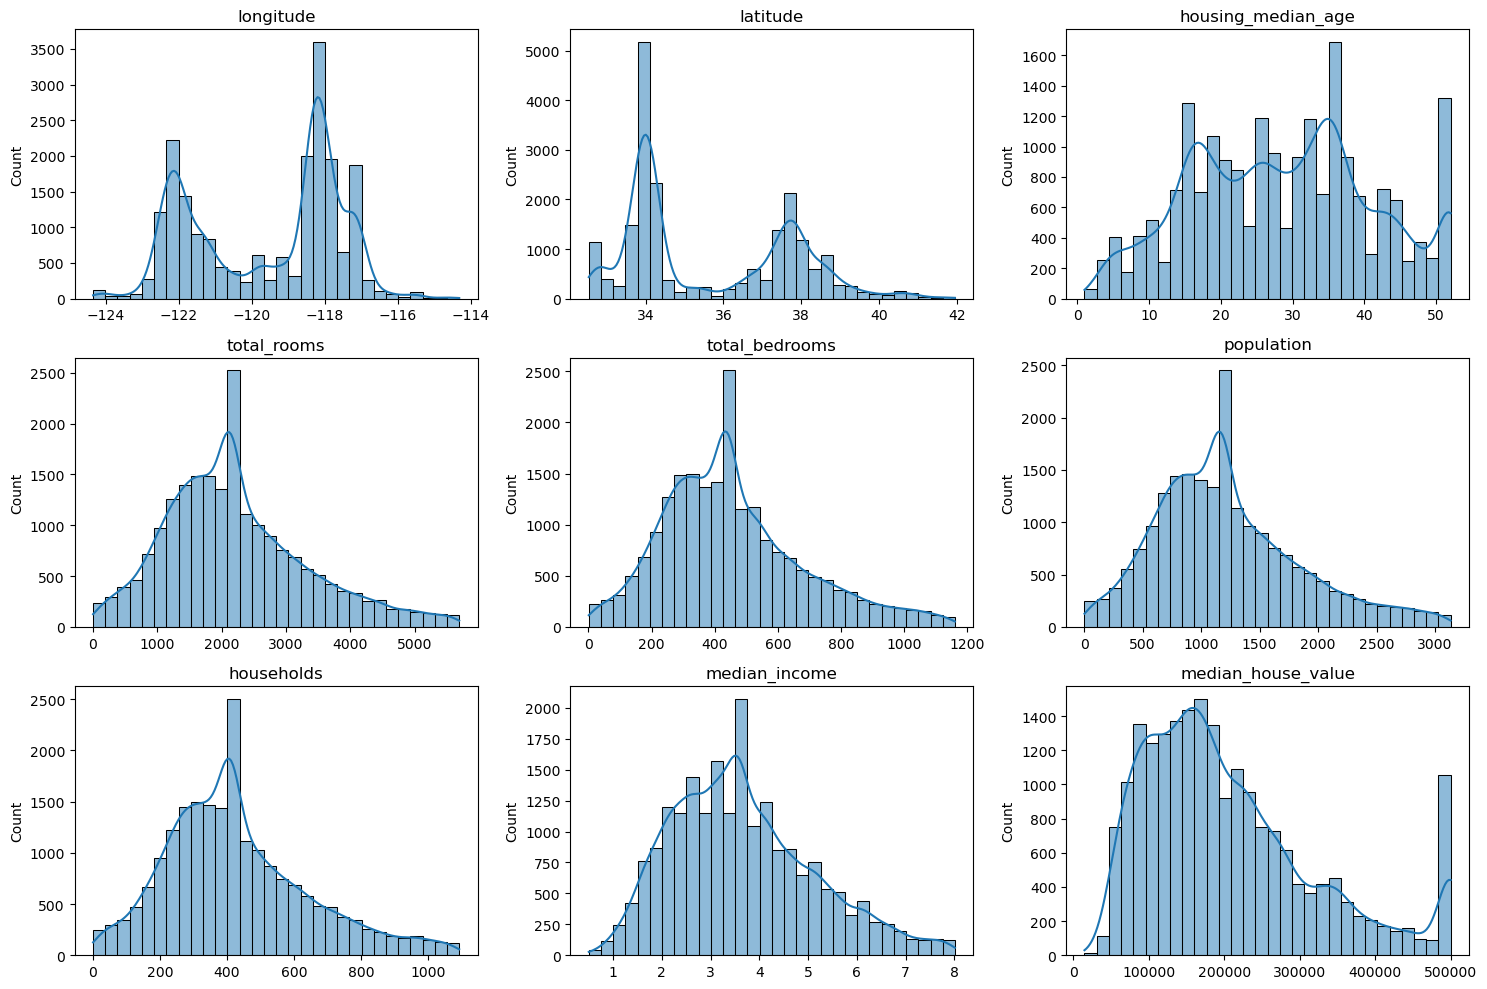

In [41]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

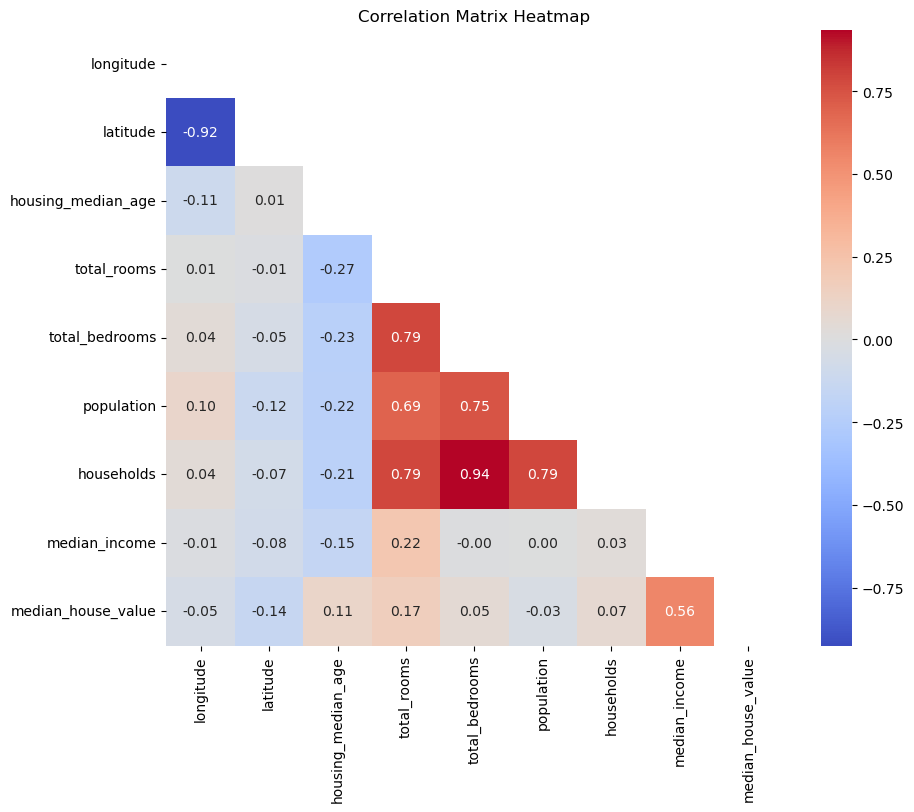

In [42]:
# Select numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Categorical Feature Encoding

In [43]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'ocean_proximity' column
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [44]:
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

## Data Splitting

In [77]:
# Splitting the data into features (X) and labels (y)
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


In [79]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,537.0,1392.0,359.0,1.6812,1
3024,-119.46,35.14,30.0,2943.0,537.0,1565.0,584.0,2.5313,1
15663,-122.44,37.80,52.0,3830.0,537.0,1310.0,963.0,3.4801,3
20484,-118.72,34.28,17.0,3051.0,537.0,1705.0,495.0,5.7376,0
9814,-121.93,36.62,34.0,2351.0,537.0,1063.0,428.0,3.7250,4
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,4
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,3.5348,0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,1


## Feature Importance

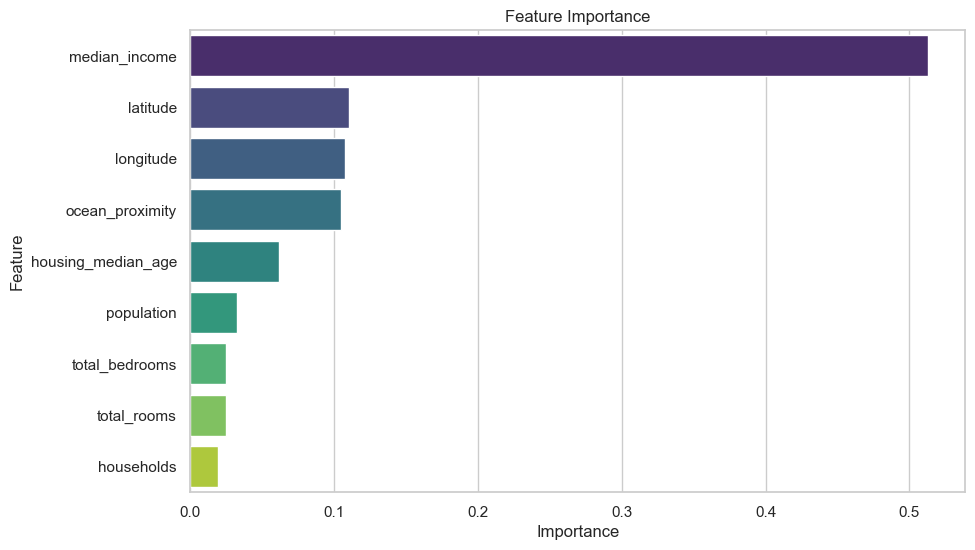

In [80]:
# Initialize RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Feature Scaling

In [81]:
# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [82]:
X_train

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.90382089,
        -0.2741694 ,  2.00593172],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  1.52366991,
         0.10223662,  2.00593172],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.43374805,
         0.33629049,  2.00593172],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.45641107,
        -0.49556068, -0.81854604],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.60554767,
         1.40028934, -0.81854604],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.09353017,
        -0.7398944 ,  1.29981228]])

In [83]:
X_test

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.32655612,
        -1.34872041, -0.1124266 ],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.72206065,
        -0.7699851 , -0.1124266 ],
       [-1.42487026,  1.00947776,  1.85617335, ...,  2.48839733,
        -0.12405631,  1.29981228],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.64749235,
        -0.08681737, -0.81854604],
       [-0.08860699,  0.52740357,  0.58654547, ...,  0.20940356,
        -0.59726995, -0.1124266 ],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.08823007,
        -0.07503979, -0.81854604]])

# Modeling

## + RandomForestRegressor

In [52]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [53]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

In [55]:
# Check True Value vs Predicted Value on Test Set
regression_data = pd.DataFrame(zip(y_test, y_pred_rf),columns=['True Value','Predicted Value'])
regression_data

,True Value,Predicted Value
0,47700.0,53553.00
1,45800.0,70417.00
2,500001.0,447785.34
3,218600.0,268308.00
4,278000.0,261226.04
...,...,...
4123,263300.0,217137.00
4124,266800.0,244115.00
4125,500001.0,456339.64
4126,72300.0,70373.00


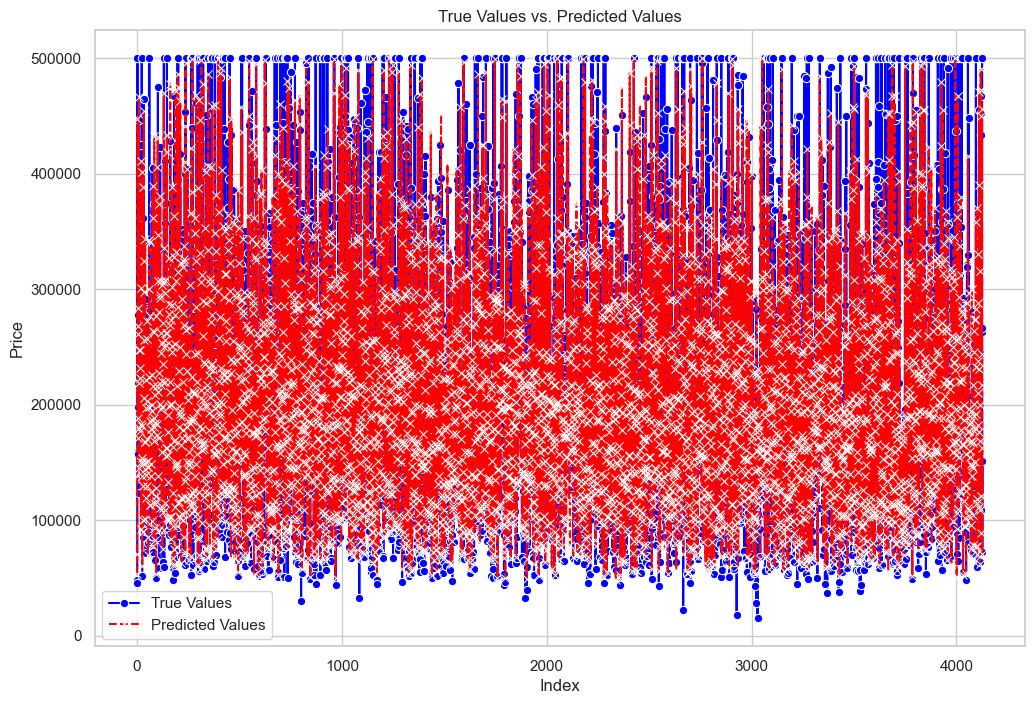

In [56]:
# Generate x values for the entire length of y_test
x = np.arange(len(y_test))

# Define a function to visualize line plot of true values vs predicted values
def true_vs_predicted_values(y_pred):
    sns.set(style="whitegrid")  # Set the style
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=x, y=y_test, label='True Values', marker='o', linestyle='-', color='blue')
    sns.lineplot(x=x, y=y_pred, label='Predicted Values', marker='x', linestyle='--', color='red')
    
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.title('True Values vs. Predicted Values')
    
    plt.show()

# Call function for plotting
true_vs_predicted_values(y_pred_rf)

### + Evaluation

In [57]:
# Define a function to calculate RMSE
def root_mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [58]:
# Print Evaluation Metric
print("Evaluation (Regression) of RandomForestRegressor of :\n")
print('\tMSE: ', mean_squared_error(y_test, y_pred_rf), ", {lower is better}")
print('\tRMSE: ', root_mean_squared_error(y_test, y_pred_rf), ", {lower is better}")
print('\tMAE: ', mean_absolute_error(y_test, y_pred_rf), ", {lower is better}")
print('\tR2-Score: ', r2_score(y_test, y_pred_rf), ", {0 to 1, higher is better}")

Evaluation (Regression) of RandomForestRegressor of :

	MSE:  2555026087.959881 , {lower is better}
	RMSE:  50547.2658801629 , {lower is better}
	MAE:  32820.35463905038 , {lower is better}
	R2-Score:  0.8050207125877784 , {0 to 1, higher is better}


## + LinearRegression

In [59]:
# Initialize the LinearRegression
lr_regressor = LinearRegression()

In [60]:
# Train the model
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions on the test set
y_pred_lr = lr_regressor.predict(X_test)

In [62]:
# Check True Value vs Predicted Value on Test Set
regression_data = pd.DataFrame(zip(y_test, y_pred_lr),columns=['True Value','Predicted Value'])
regression_data

,True Value,Predicted Value
0,47700.0,68633.959472
1,45800.0,188406.054248
2,500001.0,280660.619186
3,218600.0,294607.850544
4,278000.0,299256.603351
...,...,...
4123,263300.0,236644.224341
4124,266800.0,293525.770874
4125,500001.0,260149.989235
4126,72300.0,138218.351209


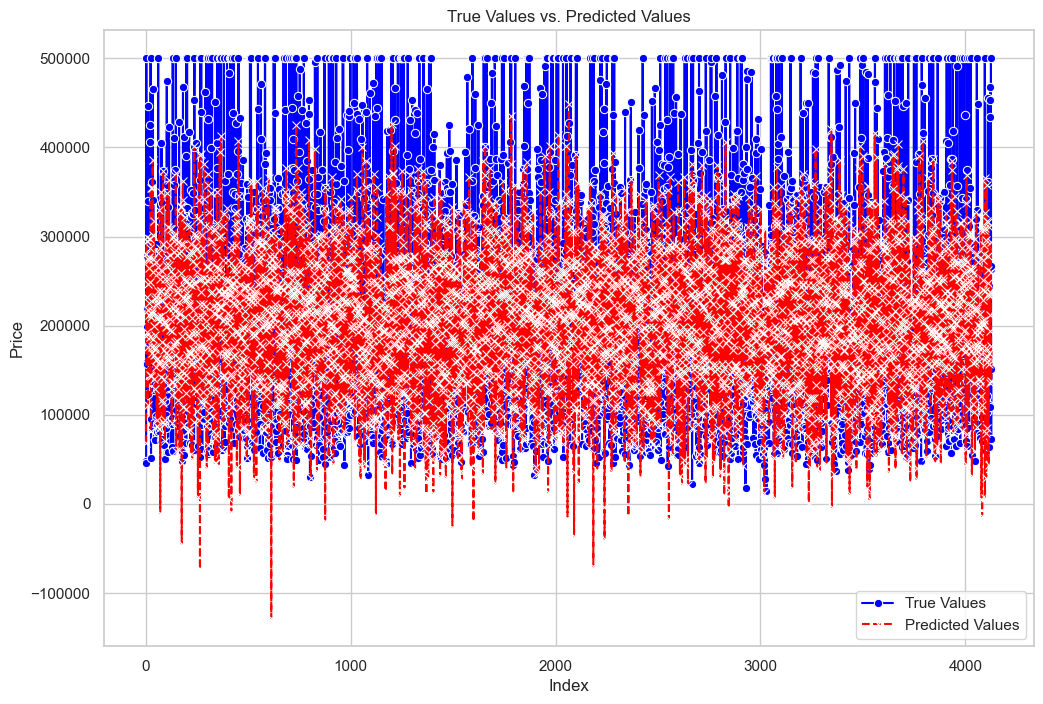

In [63]:
# Call function for plotting
true_vs_predicted_values(y_pred_lr)

### + Evaluation

In [64]:
# Print Evaluation Metric
print("Evaluation (Regression) of LinearRegression of :\n")
print('\tMSE: ', mean_squared_error(y_test, y_pred_lr), ", {lower is better}")
print('\tRMSE: ', root_mean_squared_error(y_test, y_pred_lr), ", {lower is better}")
print('\tMAE: ', mean_absolute_error(y_test, y_pred_lr), ", {lower is better}")
print('\tR2-Score: ', r2_score(y_test, y_pred_lr), ", {0 to 1, higher is better}")

Evaluation (Regression) of LinearRegression of :

	MSE:  6892660235.601279 , {lower is better}
	RMSE:  83022.04668400604 , {lower is better}
	MAE:  60429.13270035975 , {lower is better}
	R2-Score:  0.47400694362961215 , {0 to 1, higher is better}


## + GradientBoostingRegression

In [65]:
# Initialize the Gradient Boosting Regression model with parameters
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust parameters such as n_estimators, learning_rate, max_depth, etc., based on your data characteristics and requirements

In [66]:
# Train the model
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [67]:
# Make predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

In [68]:
# Check True Value vs Predicted Value on Test Set
regression_data = pd.DataFrame(zip(y_test, y_pred_gb),columns=['True Value','Predicted Value'])
regression_data

,True Value,Predicted Value
0,47700.0,56187.711403
1,45800.0,88310.005450
2,500001.0,373380.659199
3,218600.0,270434.957264
4,278000.0,276978.525359
...,...,...
4123,263300.0,210828.951053
4124,266800.0,231876.875615
4125,500001.0,427073.623743
4126,72300.0,99130.525313


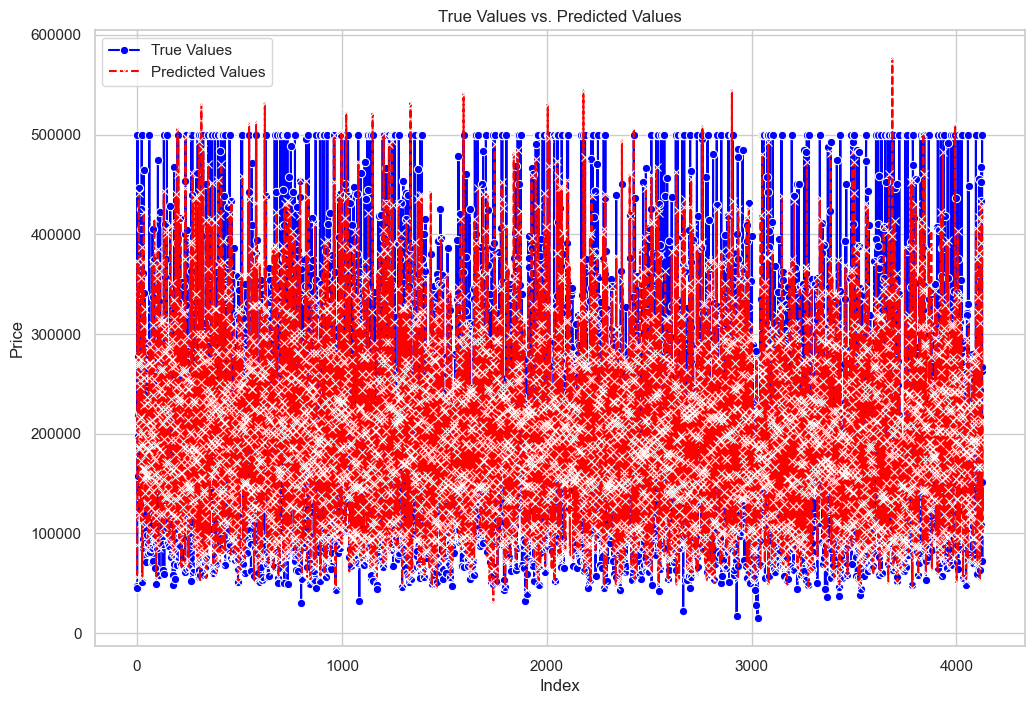

In [69]:
# Call function for plotting
true_vs_predicted_values(y_pred_gb)

### + Evaluation

In [70]:
# Print Evaluation Metric
print("Evaluation (Regression) of GradientBoostingRegression of :\n")
print('\tMSE: ', mean_squared_error(y_test, y_pred_gb), ", {lower is better}")
print('\tRMSE: ', root_mean_squared_error(y_test, y_pred_gb), ", {lower is better}")
print('\tMAE: ', mean_absolute_error(y_test, y_pred_gb), ", {lower is better}")
print('\tR2-Score: ', r2_score(y_test, y_pred_gb), ", {0 to 1, higher is better}")

Evaluation (Regression) of GradientBoostingRegression of :

	MSE:  3217978717.390409 , {lower is better}
	RMSE:  56727.230827799176 , {lower is better}
	MAE:  39417.046128845766 , {lower is better}
	R2-Score:  0.7544294360902318 , {0 to 1, higher is better}


## + Conclusion

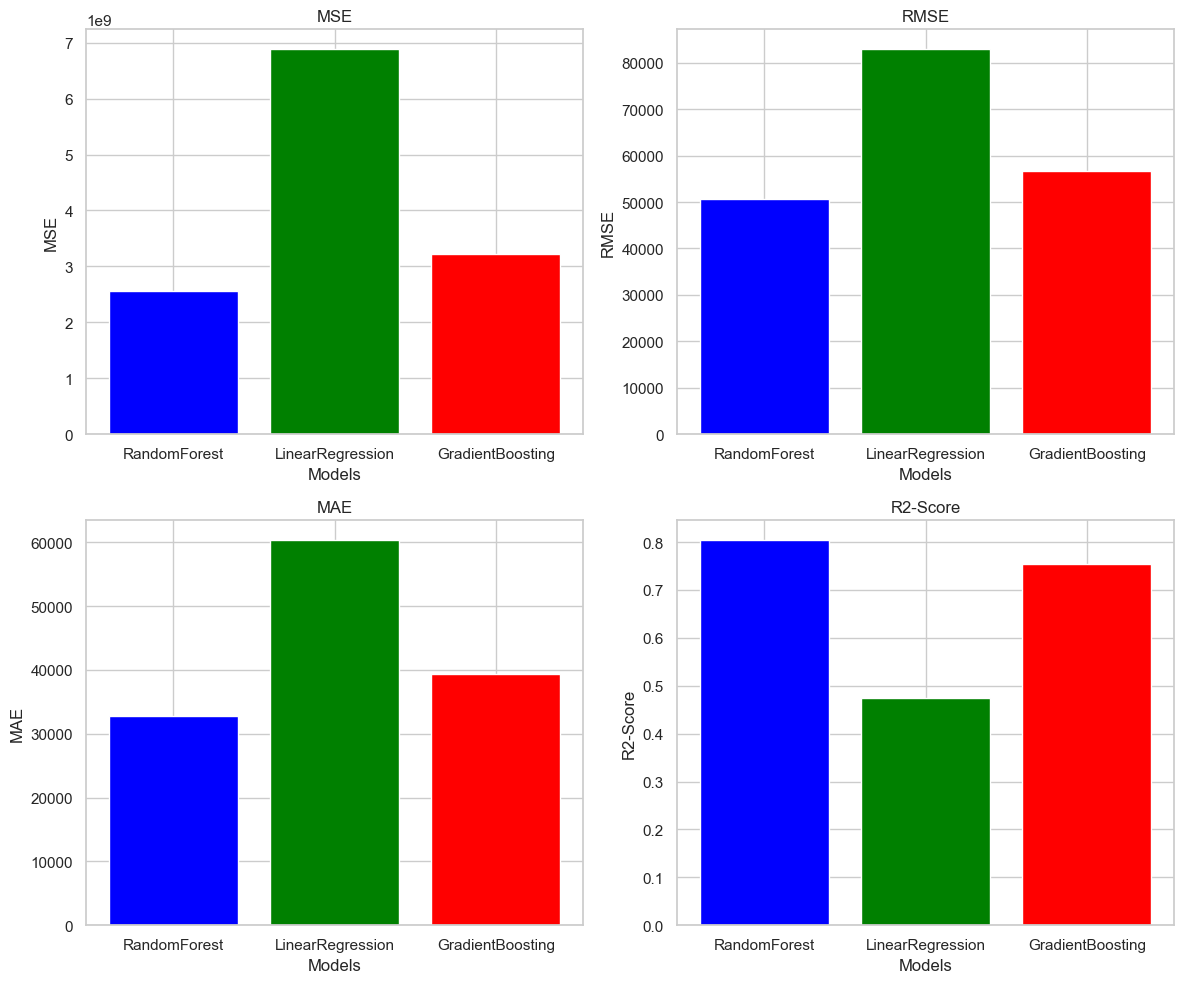

In [71]:
# Evaluation metrics
models = ['RandomForest', 'LinearRegression', 'GradientBoosting']
mse = [2555026087.959881, 6892660235.601279, 3217978717.390409]
rmse = [50547.2658801629, 83022.04668400604, 56727.230827799176]
mae = [32820.35463905038, 60429.13270035975, 39417.046128845766]
r2_score = [0.8050207125877784, 0.47400694362961215, 0.7544294360902318]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

metrics = ['MSE', 'RMSE', 'MAE', 'R2-Score']
values = [mse, rmse, mae, r2_score]

for i, (metric, vals) in enumerate(zip(metrics, values)):
    axs[i].bar(models, vals, color=['blue', 'green', 'red'])
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Models')

plt.tight_layout()
plt.show()

| Model            | MSE            | RMSE         | MAE           | R2-Score    |
|------------------|----------------|--------------|---------------|-------------|
| RandomForest    | 2.555e9        | 50547.27     | 32820.35      | 0.805       |
| LinearRegression| 6.893e9        | 83022.05     | 60429.13      | 0.474       |
| GradientBoosting| 3.218e9        | 56727.23     | 39417.05      | 0.754       |


- RandomForestRegressor consistently outperforms LinearRegression and GradientBoostingRegressor across all evaluation metrics. It demonstrates lower errors (MSE, RMSE, MAE) and a higher coefficient of determination (R2-Score), suggesting superior predictive performance for this regression task. Therefore, RandomForestRegressor is the preferred model choice.

# Inference

- After satisfactory evaluation results, the model can be used to make predictions, called inferences, on unlabeled examples.


In [88]:
def predict_median_house_value(scaler, rf_regressor):
    # Map to let the user know which number corresponds to each ocean proximity category
    ocean_proximity_mapping = {
        'NEAR BAY': 3,
        '<1H OCEAN': 0,
        'INLAND': 1,
        'NEAR OCEAN': 4,
        'ISLAND': 2
    }

    # Prompt the user for input and display the mapping
    user_input = {}
    user_input['longitude'] = float(input("Enter longitude: "))
    user_input['latitude'] = float(input("Enter latitude: "))
    user_input['housing_median_age'] = float(input("Enter housing median age: "))
    user_input['total_rooms'] = float(input("Enter total rooms: "))
    user_input['total_bedrooms'] = float(input("Enter total bedrooms: "))
    user_input['population'] = float(input("Enter population: "))
    user_input['households'] = float(input("Enter households: "))
    user_input['median_income'] = float(input("Enter median income: "))
    user_input['ocean_proximity'] = input("Enter ocean proximity (NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND): ")

    # Convert user input to corresponding number
    user_input['ocean_proximity'] = ocean_proximity_mapping.get(user_input['ocean_proximity'].upper(), None)

    # Check if the input is valid
    if user_input['ocean_proximity'] is None:
        print("Invalid input for ocean proximity!")
    else:
        # Convert user input to DataFrame
        user_input_df = pd.DataFrame(user_input, index=[0])

        # Transform user input using StandardScaler
        scaled_user_input = scaler.transform(user_input_df)

        # Make prediction
        predicted_value = rf_regressor.predict(scaled_user_input)

        # Round the predicted value to remove decimal places
        predicted_value_rounded = round(predicted_value[0])

        print("Predicted median house value:", predicted_value_rounded)

In [89]:
# Let's Test 
predict_median_house_value(scaler, rf_regressor)

Enter longitude:  122.23
Enter latitude:  37.88
Enter housing median age:  41.0
Enter total rooms:  880.0
Enter total bedrooms:  129.0
Enter population:  322.0
Enter households:  126.0
Enter median income:  3.5348
Enter ocean proximity (NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND):  NEAR BAY


Predicted median house value: 408797


In [90]:
# Let's Test 
predict_median_house_value(scaler, rf_regressor)

Enter longitude:  -121.32	
Enter latitude:  39.37
Enter housing median age:  16.0
Enter total rooms:  2785.0
Enter total bedrooms:  616.0
Enter population:  1387.0	
Enter households:  530.0
Enter median income:  2.3886	
Enter ocean proximity (NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND):  INLAND


Predicted median house value: 88445


# Model Saving

In [93]:
# Save the trained RandomForestRegressor model with compression
joblib.dump(rf_regressor, '../models/best_model.pkl.gz', compress=('gzip', 3))

['../models/best_model.pkl.gz']

In [92]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']